<a href="https://colab.research.google.com/github/Say2hub/ML-Labs/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###***Name:Sayantan Mukherjee***
###***Sap-Id:60009220131***
###***Batch:D2-2***


In [ ]:
import pandas as pd
df=pd.read_csv('/content/PlayTennis.csv')
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


#***Hot Encoding***


In [ ]:
df['Play Tennis']=df['Play Tennis'].replace({'Yes':1,'No':0})
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,0
1,Sunny,Hot,High,Strong,0
2,Overcast,Hot,High,Weak,1
3,Rain,Mild,High,Weak,1
4,Rain,Cool,Normal,Weak,1
5,Rain,Cool,Normal,Strong,0
6,Overcast,Cool,Normal,Strong,1
7,Sunny,Mild,High,Weak,0
8,Sunny,Cool,Normal,Weak,1
9,Rain,Mild,Normal,Weak,1


#***Entropy Outlook***


In [ ]:
import pandas as pd
import math

def calculate_entropy_outlook(df, outlook_value):

    filtered_df = df[df['Outlook'] == outlook_value]

    entropy = 0
    total_count = len(filtered_df)
    if total_count == 0:
        return entropy
    value_counts = filtered_df['Play Tennis'].value_counts()
    for count in value_counts:
        probability = count / total_count
        entropy -= probability * math.log2(probability)

    return entropy


outlooks = df['Outlook'].unique()
for outlook in outlooks:
    entropy = calculate_entropy_outlook(df, outlook)
    print(f"Entropy for Outlook '{outlook}': {entropy}")

Entropy for Outlook 'Sunny': 0.9709505944546686
Entropy for Outlook 'Overcast': 0.0
Entropy for Outlook 'Rain': 0.9709505944546686


#***Entropy Temperature***

In [ ]:
import pandas as pd
import math

def calculate_entropy_temperature(df, temperature_value):

    filtered_df = df[df['Temperature'] == temperature_value]
    entropy = 0
    total_count = len(filtered_df)
    if total_count == 0:
        return entropy
    value_counts = filtered_df['Play Tennis'].value_counts()
    for count in value_counts:
        probability = count / total_count
        entropy -= probability * math.log2(probability)

    return entropy

temperatures = df['Temperature'].unique()
for temp in temperatures:
    entropy = calculate_entropy_temperature(df, temp)
    print(f"Entropy for Temperature '{temp}': {entropy}")

Entropy for Temperature 'Hot': 1.0
Entropy for Temperature 'Mild': 0.9182958340544896
Entropy for Temperature 'Cool': 0.8112781244591328


#***Entropy Humidity***

In [ ]:
import pandas as pd
import math

def calculate_entropy_humidity(df, humidity_value):

    filtered_df = df[df['Humidity'] == humidity_value]
    entropy = 0
    total_count = len(filtered_df)
    if total_count == 0:
        return entropy
    value_counts = filtered_df['Play Tennis'].value_counts()
    for count in value_counts:
        probability = count / total_count
        entropy -= probability * math.log2(probability)

    return entropy

humidities = df['Humidity'].unique()
for humidity in humidities:
    entropy = calculate_entropy_humidity(df, humidity)
    print(f"Entropy for Humidity '{humidity}': {entropy}")

Entropy for Humidity 'High': 0.9852281360342515
Entropy for Humidity 'Normal': 0.5916727785823275


#***Entropy Wind***

In [ ]:
import pandas as pd
import math

def calculate_entropy_wind(df, wind_value):

    filtered_df = df[df['Wind'] == wind_value]


    entropy = 0
    total_count = len(filtered_df)
    if total_count == 0:
        return entropy
    value_counts = filtered_df['Play Tennis'].value_counts()
    for count in value_counts:
        probability = count / total_count
        entropy -= probability * math.log2(probability)

    return entropy

winds = df['Wind'].unique()
for wind in winds:
    entropy = calculate_entropy_wind(df, wind)
    print(f"Entropy for Wind '{wind}': {entropy}")

Entropy for Wind 'Weak': 0.8112781244591328
Entropy for Wind 'Strong': 1.0


#***Gini Index***


In [ ]:
import pandas as pd

def calculate_gini_index(df, attribute):
    gini_index = 0
    total_instances = len(df)

    attribute_values = df[attribute].unique()

    for value in attribute_values:
        subset = df[df[attribute] == value]
        proportion = len(subset) / total_instances
        gini_index += proportion * (1 - (subset['Play Tennis'].value_counts(normalize=True) ** 2).sum())

    return gini_index

attributes = ['Outlook', 'Temperature', 'Humidity', 'Wind']
for attribute in attributes:
    gini_index = calculate_gini_index(df, attribute)
    print(f"Gini Index for {attribute}: {gini_index}")

Gini Index for Outlook: 0.34285714285714286
Gini Index for Temperature: 0.44047619047619047
Gini Index for Humidity: 0.3673469387755103
Gini Index for Wind: 0.42857142857142855


#***Best Attribute For Root Node***


In [ ]:
best_attribute = None
best_gini = float('inf')
for attribute in attributes:
    gini = calculate_gini_index(df, attribute)
    if gini < best_gini:
        best_attribute = attribute
        best_gini = gini

print(f"Best attribute to use as root node: {best_attribute}")

Best attribute to use as root node: Outlook


#***Decision Tree***

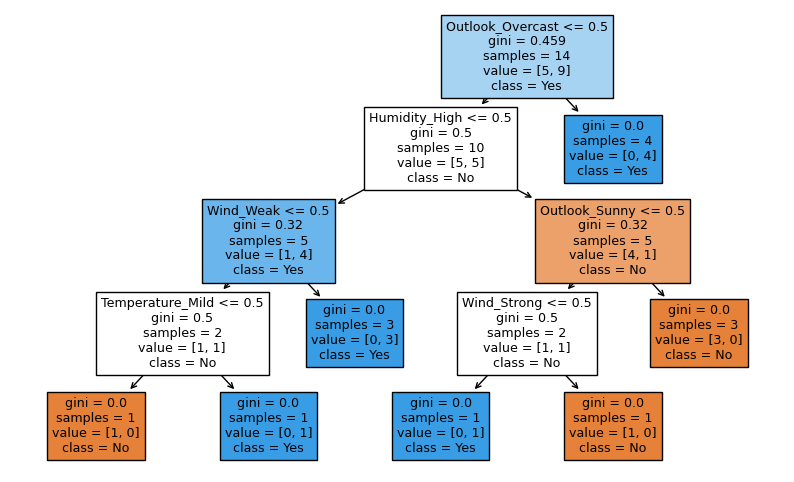

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df)

X = df_encoded.drop(columns=['Play Tennis'])
y = df_encoded['Play Tennis']

clf = DecisionTreeClassifier(criterion='gini', random_state=40)
clf.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()
